In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.colors as mcolors
import geopandas as gpd
import seaborn as sns
import matplotlib.ticker as ticker

In [9]:
grid_features = pd.read_csv("../dataset/grid_features.csv")
# Load country border data
country_borders = gpd.read_file("../visualization/cn-country-border.json")

<module 'matplotlib.pyplot' from '/Users/codercat/miniconda3/envs/ML/lib/python3.8/site-packages/matplotlib/pyplot.py'>

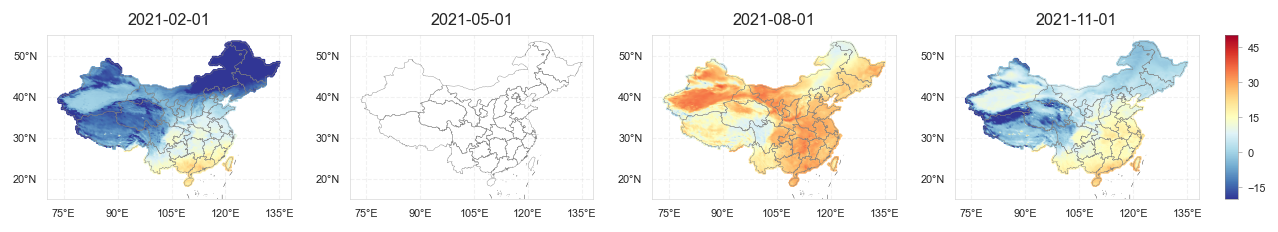

In [12]:
dates = ['2021-02-01', '2021-05-01', '2021-08-01', '2021-11-01']

fig, axs = plt.subplots(1, 4, figsize=(10, 2), dpi=130)
# plt.suptitle('Spatial Distribution of Temperature over China', fontsize=14)

axs = axs.ravel()  # Flatten array of axes
cmap = plt.get_cmap('RdYlBu_r')  # Get the colormap
norm = mcolors.Normalize(vmin=-20, vmax=50)  # Normalize the colormap

for ax, date in zip(axs, dates):
    one_day_grid_features = grid_features[grid_features['date'] == date]
    country_borders.plot(fc="none", ec="gray", ax=ax, lw=0.2, zorder=1.2)
    ax.tick_params(axis='both', labelsize=6, width=0.3, length=2)
    scatter = ax.scatter(one_day_grid_features['lon'], one_day_grid_features["lat"],
                         c=one_day_grid_features['TMP_P0_L1_GLL0'],
                         s=1.5, ec="k", lw=0, cmap=cmap, norm=norm)

    # Set latitude and longitude labels and ranges
    ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.1d°N'))
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1d°E'))

    # Instead of using LinearLocator, use MaxNLocator and prune='both' to avoid having labels outside of the subplot
    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=4, prune='both'))
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=6, prune='both'))

    # Set grid
    ax.grid(which="both", linestyle="--", axis="both", c="lightgray", linewidth=.6, alpha=.3)
    ax.set_axisbelow(True)

    # Set the latitude range
    ax.set_ylim([15, 55])  # This line trims the map to between 20 and 55 degrees north

    # ax.set_aspect(0.9)
    ax.set_title(date, fontsize=9)
    plt.setp(ax.spines.values(), linewidth=0.3)

# ...

plt.tight_layout()
fig.subplots_adjust(right=0.93)  # Adjust the right border of the subplots to make room for the colorbar

# Get the position of the first subplot
subplots_pos = axs[0].get_position()

# Define the position and size of the colorbar
cbar_ax = fig.add_axes([0.95, subplots_pos.y0, 0.01, subplots_pos.height])

# Add the colorbar
cbar = fig.colorbar(scatter, cax=cbar_ax)

# Change the colorbar's border color and width
for spine in cbar_ax.spines.values():
    spine.set_edgecolor('gray')
    spine.set_linewidth(0.3)

# Adjust the appearance of the colorbar ticks
cbar.ax.tick_params(labelsize=6, width=0.3, length=2, color='gray')

# Set the number of ticks
cbar.locator = ticker.MaxNLocator(nbins=6)
cbar.update_ticks()

# plt.savefig('Temperature.png', format='png', transparent=True, pad_inches=0, dpi=130)
# plt.show()
plt